<a href="https://colab.research.google.com/github/yubin8773/2021-deep-learning/blob/main/keras_3_4_210722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
len(train_data[0])

218

In [4]:
train_data.shape

(25000,)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# 옵티마이저 설정하기
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [17]:
# 검증세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# 모델 훈련하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 17s 41ms/step - loss: 0.5990 - acc: 0.7157 - val_loss: 0.3910 - val_acc: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3304 - acc: 0.8974 - val_loss: 0.3060 - val_acc: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2340 - acc: 0.9275 - val_loss: 0.2917 - val_acc: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1818 - acc: 0.9444 - val_loss: 0.2749 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1476 - acc: 0.9543 - val_loss: 0.2788 - val_acc: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1197 - acc: 0.9664 - val_loss: 0.2979 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0938 - acc: 0.9743 - val_loss: 0.3112 - val_acc: 0.8830
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0812 - 

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<function matplotlib.pyplot.show>

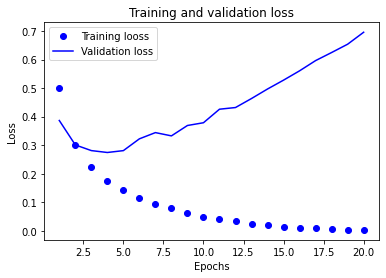

In [18]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

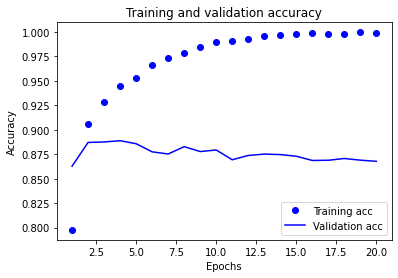

In [19]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [20]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5498 - accuracy: 0.7227
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2623 - accuracy: 0.9153
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1967 - accuracy: 0.9323
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3114 - accuracy: 0.8781


In [21]:
model.predict(x_test)

array([[0.1487706 ],
       [0.99994516],
       [0.39533004],
       ...,
       [0.08624466],
       [0.05232516],
       [0.42593342]], dtype=float32)

In [22]:
# 추가실험-레이어 1개만
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5416 - accuracy: 0.7589
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2927 - accuracy: 0.9046
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2211 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2830 - accuracy: 0.8869


In [23]:
# 추가실험-노트 32개
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5338 - accuracy: 0.7285
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2497 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1972 - accuracy: 0.9254
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3116 - accuracy: 0.8795


In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
# 추가실험-로스 함수 변경
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [21]:
# 추가실험-tanh으로 변경
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.5168 - accuracy: 0.7554
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2398 - accuracy: 0.9172
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1761 - accuracy: 0.9375
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3250 - accuracy: 0.8768
